## Wine Quality Prediction


This is a classification predictive analytics project. Here I will be using logistic regression, KNN, random forest, and boosted tree models to predict the quality of wine and check which model best fits to our needs. 

### Importing Libraries, Dataset, and EDA

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.preprocessing import MinMaxScaler



In [2]:
#importing dataset
df = pd.read_csv('winequality_white.csv')

In [3]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [4]:
df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

For the purpose of this project, we will classify wine as either good or bad. So, if the quality is greater than 6, we will classify it as good. But if the quality is less than or equal to 6, we will classify it as bad.

In [5]:
#recoding target variable as 1 (quality > 6) and 0 (quality < 7)
df.loc[df['quality']<7,"quality"]=0
df.loc[df['quality']>6,"quality"]=1


In [6]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,0


<AxesSubplot:>

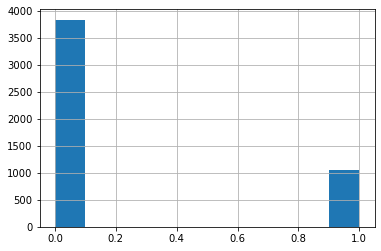

In [7]:
#accessing target variable distribution
df['quality'].hist()

<AxesSubplot:>

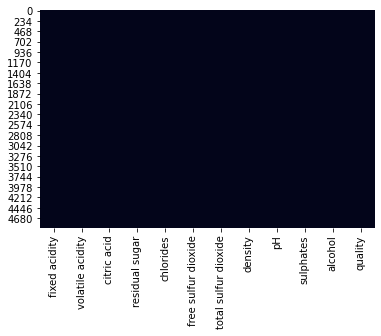

In [8]:
#examining missing values with heatmap
sns.heatmap(df.isnull(),cbar=False)

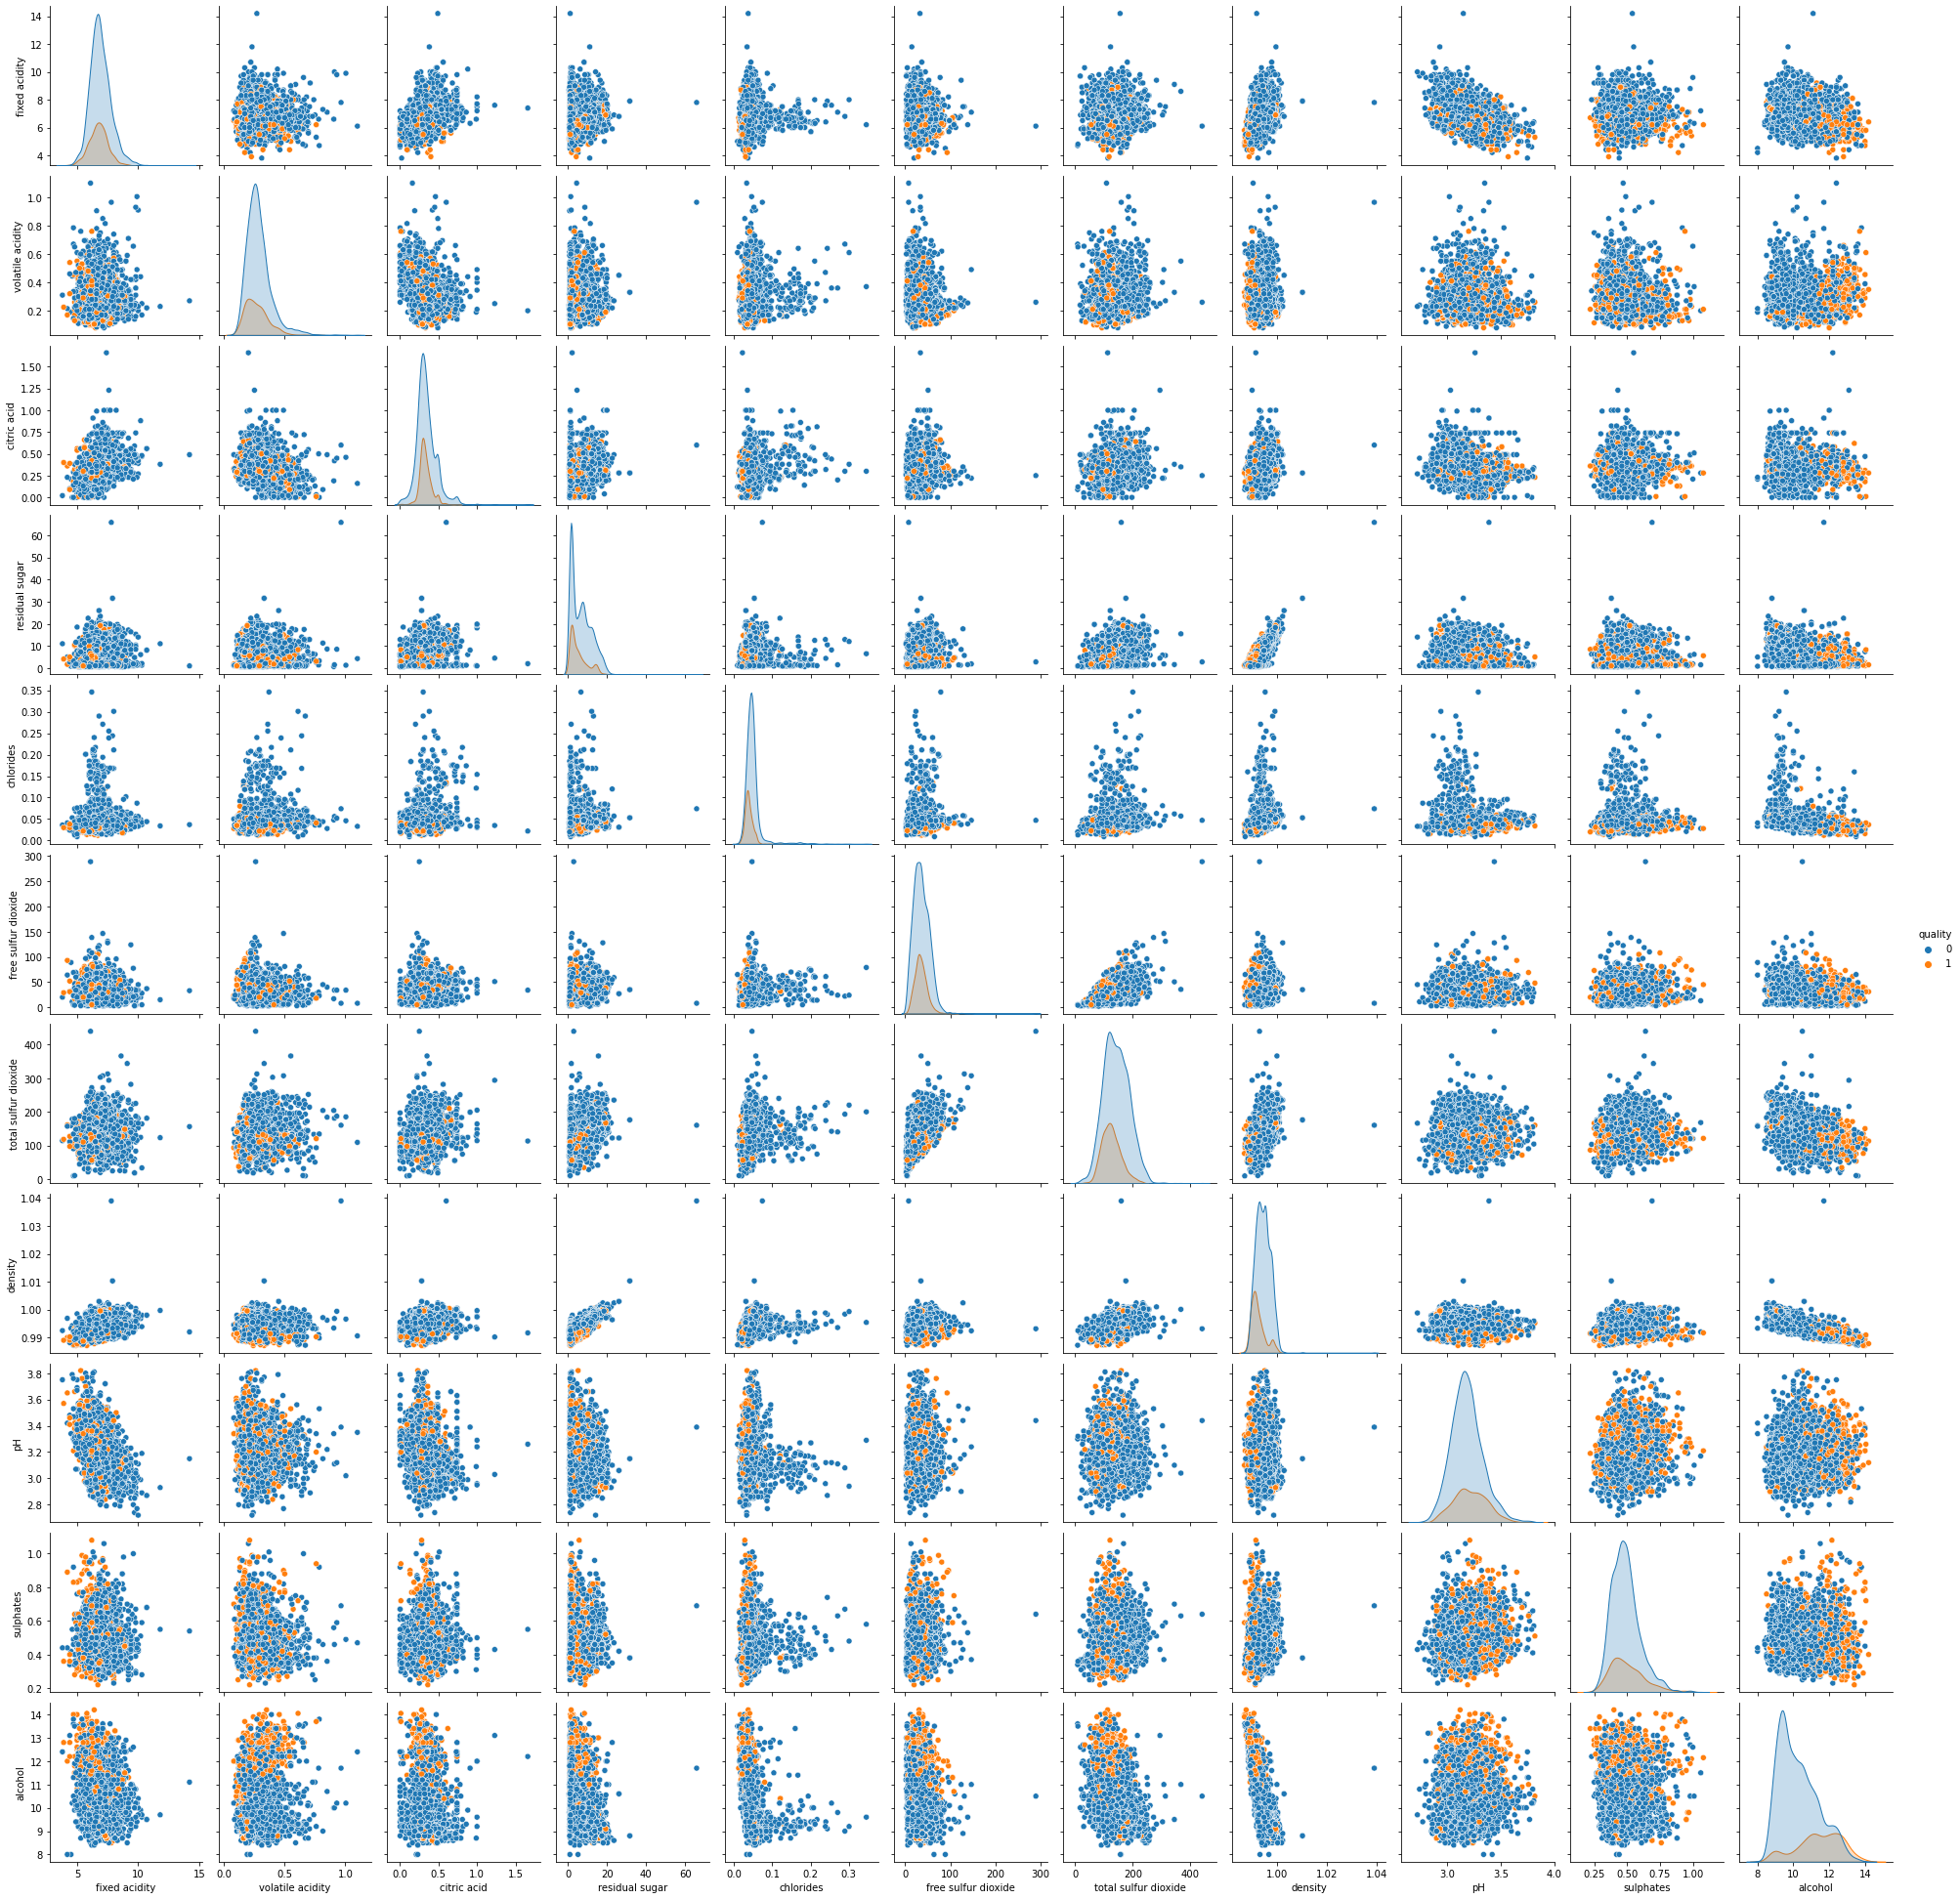

In [9]:
#exploring distribution and individual values
sns.pairplot(df,hue="quality")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [11]:
#removing outliers identified from above pairplot
df.drop(df[df["fixed acidity"]>13].index,inplace=True)
df.drop(df[df["citric acid"]>1].index,inplace=True)
df.drop(df[df["residual sugar"]>40].index,inplace=True)
df.drop(df[df["free sulfur dioxide"]>200].index,inplace=True)
df.drop(df[df["density"]>1.02].index,inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4893 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4893 non-null   float64
 1   volatile acidity      4893 non-null   float64
 2   citric acid           4893 non-null   float64
 3   residual sugar        4893 non-null   float64
 4   chlorides             4893 non-null   float64
 5   free sulfur dioxide   4893 non-null   float64
 6   total sulfur dioxide  4893 non-null   float64
 7   density               4893 non-null   float64
 8   pH                    4893 non-null   float64
 9   sulphates             4893 non-null   float64
 10  alcohol               4893 non-null   float64
 11  quality               4893 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 626.0 KB


In [13]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4893.000000,4893.000000,4893.000000,4893.000000,4893.000000,4893.000000,4893.000000,4893.000000,4893.000000,4893.000000,4893.000000,4893.000000
mean,6.852984,0.278128,0.333669,6.382311,0.045775,35.259350,138.264357,0.994020,3.188199,0.489765,10.513035,0.216636
std,0.837458,0.100359,0.118812,5.001788,0.021852,16.618534,42.238380,0.002922,0.150986,0.114119,1.230312,0.411995
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991730,3.090000,0.410000,9.500000,0.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993750,3.180000,0.470000,10.400000,0.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,0.000000
max,11.800000,1.100000,1.000000,31.600000,0.346000,146.500000,366.500000,1.010300,3.820000,1.080000,14.200000,1.000000


### Data Preprocessing

We have to preprocess the data differently for each models. The general preprocessing technique is listed below:
1. Logistic Regression:

        a. Mean imputation of missing values
        b. No need to normalize/standardize the data 
        c. Convert categorical variables into dummy variables
2. KNN:

        a. Mean imputation of missing values
        b. Normalize/scale the data (We will use MinMaxScaler for this project)
        c. Convert categorical variables into dummy variables
3. Decision Tree Models ( Random Forest & Boosted Tree):

        a. Assign missing values intro different categories (not mean imputation)
        b. No need to normalize/standardize the data
        c. Convert categorical values into dummy variables (but dont drop any categories)

In [14]:
#assigning input and target variables
X=df.drop('quality',axis=1)
y=df['quality']


In [15]:
#rescaling the data for KNN algorithm
scaler = MinMaxScaler()

X_ = scaler.fit_transform(X)

X_rescaled = pd.DataFrame(X_,columns=X.columns)

X_rescaled.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4893.000000,4893.000000,4893.000000,4893.000000,4893.000000,4893.000000,4893.000000,4893.000000,4893.000000,4893.000000,4893.000000
mean,0.381623,0.194243,0.333669,0.186526,0.109125,0.230169,0.361579,0.297976,0.425636,0.313680,0.405328
std,0.104682,0.098392,0.118812,0.161348,0.064842,0.115007,0.118149,0.125990,0.137260,0.132697,0.198437
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.312500,0.127451,0.270000,0.035484,0.080119,0.145329,0.276923,0.199224,0.336364,0.220930,0.241935
50%,0.375000,0.176471,0.320000,0.148387,0.100890,0.221453,0.349650,0.286330,0.418182,0.290698,0.387097
75%,0.437500,0.235294,0.390000,0.300000,0.121662,0.304498,0.441958,0.387667,0.509091,0.383721,0.548387
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
#splitting data 70/30 into training and test datasets for logistic, random forest, and boosted tree models
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

#splitting data 70/30 into training and test datasets for KNN model
X1_train, X1_test, y1_train,y1_test = train_test_split(X_rescaled,y,test_size=0.3,random_state=1)

### Logistic Regression

In [17]:
#Logistic Regression
lr= LogisticRegression(solver='liblinear')
lr.fit(X_train,y_train)

lr_y_pred = lr.predict(X_test)

lr_y_pred[:20]



array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

### KNN

<AxesSubplot:>

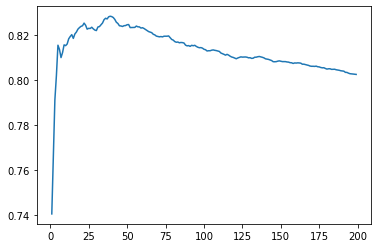

In [18]:
#KNN
#Determining optimal value of k based on ROC AUC using "cross_val_score" package
from sklearn.model_selection import cross_val_score
max_k = 200
cv_score = []

for k in range(1,max_k):
  knn = KNeighborsClassifier(n_neighbors= k)
  scores = cross_val_score(knn,X1_train,y1_train.values.ravel(),cv = 5, scoring = "roc_auc")
  cv_score.append(scores.mean())

sns.lineplot(x=range(1,max_k),y=cv_score)

Here, we can see that the optimal value of k lies in the range (25, 50). To find the exact optimal value of k, we will use following function:

In [19]:
#determining exact value of k
cv_score.index(max(cv_score))+1

39

In [20]:
#KNN
knn = KNeighborsClassifier(n_neighbors=39, metric='euclidean')
knn.fit(X1_train,y1_train)

knn_y_pred = knn.predict(X1_test)

knn_y_pred[:20]

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

### Random Forest

In [21]:
#Random Forest Classifier
rf = RandomForestClassifier(max_depth=5,random_state=0)
rf.fit(X_train,y_train)

rf_y_pred = rf.predict(X_test)

rf_y_pred[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Boosted Tree

In [22]:
# Boosted Tree Model
bt = AdaBoostClassifier(n_estimators=100)
bt.fit(X_train,y_train)

bt_y_pred = bt.predict(X_test)

bt_y_pred[:20]

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0])

### Classification Report for all models

In [23]:
# Classification Report for all models
print("Logistic Regression\n",classification_report(y_test,lr_y_pred),"\n")
print("K-Nearest Neighbours Classifier\n",classification_report(y1_test,knn_y_pred),"\n")
print("Random Forest Classifier\n",classification_report(y_test,rf_y_pred),"\n")
print("Boosted Tree Model\n",classification_report(y_test,bt_y_pred))


Logistic Regression
               precision    recall  f1-score   support

           0       0.81      0.96      0.88      1136
           1       0.67      0.25      0.36       332

    accuracy                           0.80      1468
   macro avg       0.74      0.61      0.62      1468
weighted avg       0.78      0.80      0.77      1468
 

K-Nearest Neighbours Classifier
               precision    recall  f1-score   support

           0       0.83      0.95      0.89      1136
           1       0.66      0.34      0.45       332

    accuracy                           0.81      1468
   macro avg       0.75      0.64      0.67      1468
weighted avg       0.79      0.81      0.79      1468
 

Random Forest Classifier
               precision    recall  f1-score   support

           0       0.81      0.98      0.89      1136
           1       0.76      0.22      0.34       332

    accuracy                           0.81      1468
   macro avg       0.79      0.60      0.61 

### ROC AUC Scores Comparision

In [24]:
# Calculating ROC AUC scores for all models

lr_roc_auc = roc_auc_score(y_test,lr_y_pred)
knn_roc_auc = roc_auc_score(y1_test,knn_y_pred)
rf_roc_auc = roc_auc_score(y_test,rf_y_pred)
bt_roc_auc =roc_auc_score(y_test,bt_y_pred)

print("ROC AUC Scores")
print("Logistic Regression:",lr_roc_auc)
print("K-Nearest Neighbours Classifier:",knn_roc_auc)
print("Random Forest Classifier:",rf_roc_auc)
print("Boosted Tree Model:",bt_roc_auc)

ROC AUC Scores
Logistic Regression: 0.6058883421007976
K-Nearest Neighbours Classifier: 0.6446525538774818
Random Forest Classifier: 0.5998165195995249
Boosted Tree Model: 0.6968331070761922


### ROC AUC Curve

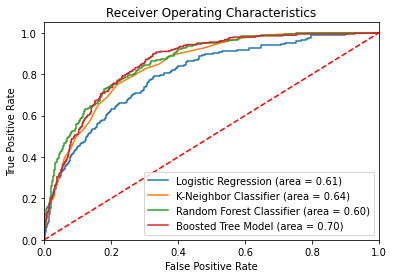

In [25]:
# Presenting ROC AUC score curve for all models
lr_fpr,lr_tpr,lr_thresholds = roc_curve(y_test,lr.predict_proba(X_test)[:,1])
knn_fpr,knn_tpr,knn_thresholds = roc_curve(y1_test,knn.predict_proba(X1_test)[:,1])
rf_fpr,rf_tpr,rf_thresholds = roc_curve(y_test,rf.predict_proba(X_test)[:,1])
bt_fpr,bt_tpr,bt_thresholds = roc_curve(y_test,bt.predict_proba(X_test)[:,1])


plt.figure()
plt.plot(lr_fpr,lr_tpr,label="Logistic Regression (area = %0.2f)"%lr_roc_auc)
plt.plot(knn_fpr,knn_tpr,label="K-Neighbor Classifier (area = %0.2f)"%knn_roc_auc)
plt.plot(rf_fpr,rf_tpr,label="Random Forest Classifier (area = %0.2f)"%rf_roc_auc)
plt.plot(bt_fpr,bt_tpr,label="Boosted Tree Model (area = %0.2f)"%bt_roc_auc)

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.plot([0,1],[0,1],'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristics")
plt.legend(loc="lower right")
plt.show()

From above ROC AUC score comparision, we can say that Boosted Tree Model is the best fit for our dataset.